In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

/home/holindauer/anaconda3/envs/torch-env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Load Image Data

/home/holindauer/anaconda3/envs/torch-env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


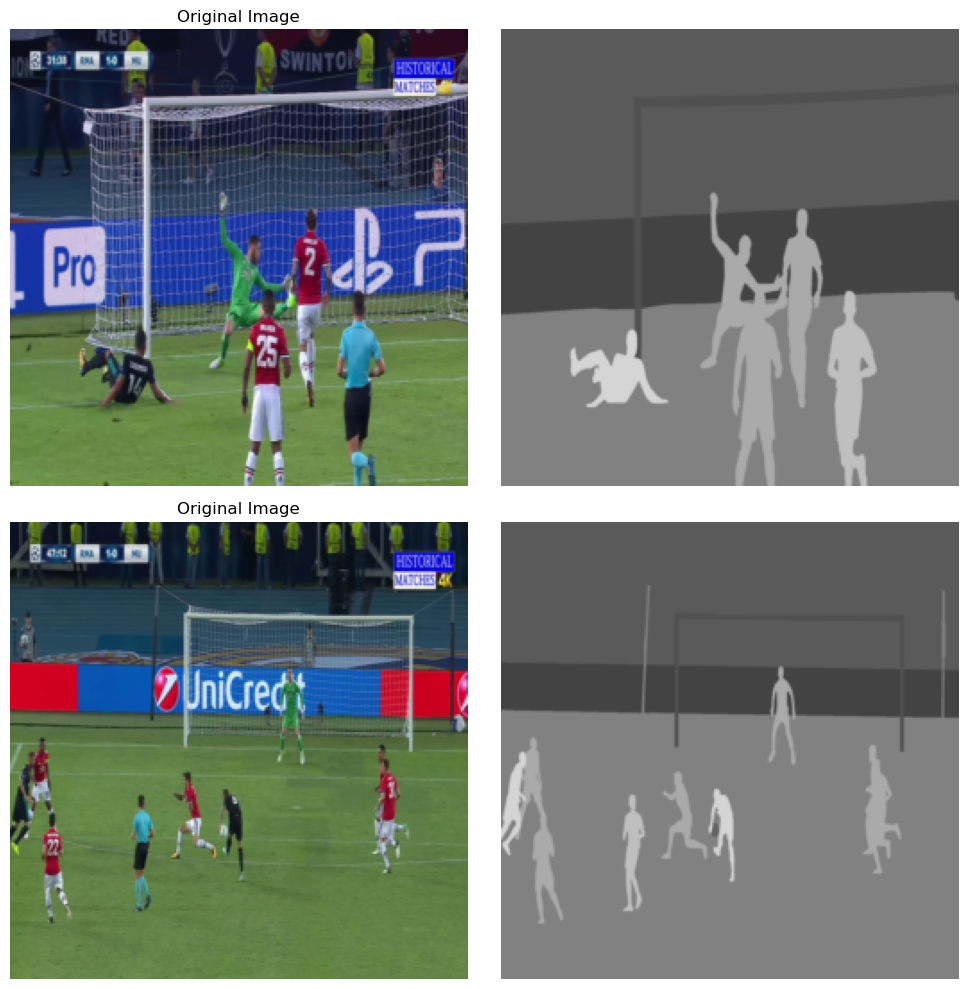

In [1]:
from dataReader import DataReader

dataReader = DataReader()
dataReader.loadSegmentationDataset('Data/original', 'Data/segmentation1')
dataloader = dataReader.wrapDataLoader(batchSize=4)

# Use the modified plotExamples method
dataReader.plot.plot_examples(dataloader, num_pairs=2)

# Model

In [9]:
from dataclasses import dataclass
from segmentationNet import SegmentationNet, SegNetConfig
import torch
import torch.nn.functional as F
from torch import nn


config = SegNetConfig(
    downsampling_channels=[64, 128, 256],
    upsampling_channels=[256, 128, 64],
    final_channels=[32, 16],
    num_classes=1,  # Number of segmentation classes
    channel_multiplier=2
)

# Instantiate model
model = SegmentationNet(config)

In [10]:
print(model)

SegmentationNet(
  (down_blocks): ModuleList(
    (0): Sequential(
      (0): ConvDownsamplingBlock(
        (conv): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1), padding=same)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ConvDownsamplingBlock(
        (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=same)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Sequential(
      (0): ConvDownsamplingBlock(
        (conv): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=same)
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ConvDownsamplingBlock(
        (conv): Conv2d(128, 128, kernel_size=(2, 2), stride=(1, 1), padding=same)
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): Sequential(
      (0): 

In [13]:
# Test forward pass using dataloader

# Get a batch of data
inputs, targets = next(iter(dataloader))

print(f"Input Shape: {inputs.shape}")
print(f"Target Shape: {targets.shape}")

# Forward pass
outputs = model(inputs)
print(f"\nOutput Shape: {outputs.shape}")


Input Shape: torch.Size([4, 3, 256, 256])
Target Shape: torch.Size([4, 1, 256, 256])
Output Shape: torch.Size([4, 1, 256, 256])
